# Import

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import string
from scipy.sparse import hstack
from sklearn.decomposition import PCA
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.decomposition import NMF
import scipy.stats as stats
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
%matplotlib inline
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.datasets import make_regression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.linear_model import LassoCV, RidgeCV,ElasticNetCV
from sklearn.model_selection import (cross_val_score, train_test_split, KFold, GridSearchCV)
from spacy import displacy
import re, nltk, spacy, gensim
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn import svm
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score, accuracy_score, classification_report, f1_score


# load the data

In [2]:
data = pd.read_csv('ResumeDataSet.csv')
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


# EDA

In [3]:
print(data['Category'].unique())
print("Number of datapoints in each categories")
print(data['Category'].value_counts())

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']
Number of datapoints in each categories
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Data Science                 40
ETL Developer                40
Blockchain                   40
Mechanical Engineer          40
Operations Manager           40
Sales                        40
Arts                         36
Database                     33
Electrical Engineering       30
PMO                          30
Health and fitness 

In [4]:
data['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

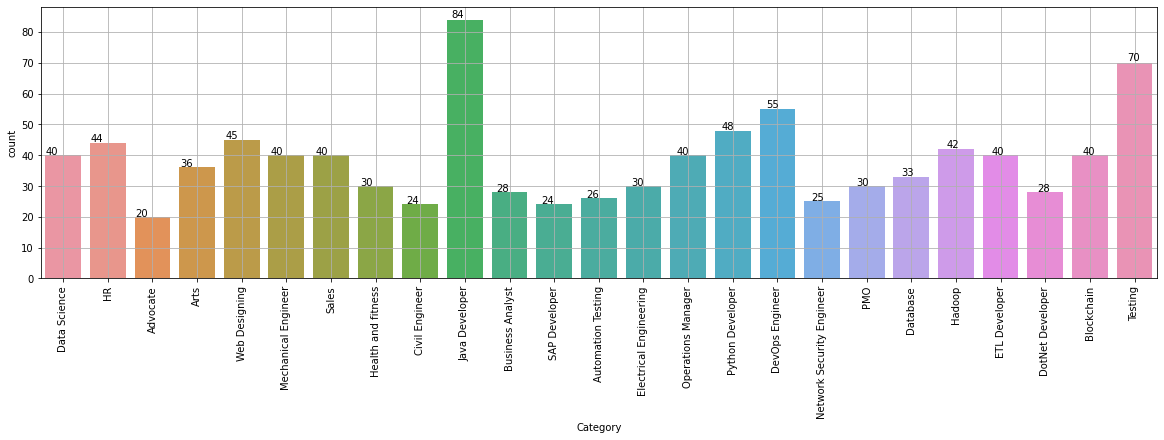

In [5]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=data)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

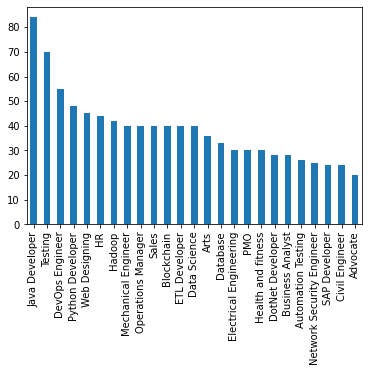

In [6]:
data['Category'].value_counts(sort=True).nlargest(25).plot.bar()

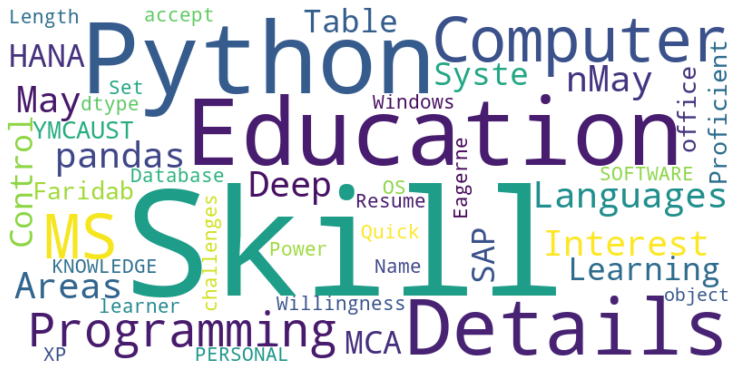

In [7]:
cloud=WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', width=800, height=400).generate(str(data["Resume"]))
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear');

In [8]:
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [9]:
data

,Category,Resume
0,6,Skills * Programming Languages: Python (pandas...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...
2,6,"Areas of Interest Deep Learning, Control Syste..."
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,6,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,23,Computer Skills: â¢ Proficient in MS office (...
958,23,â Willingness to accept the challenges. â ...
959,23,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,23,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


# NLP

In [10]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

def clean_text(text):
    #convert text to lowercase
    text = text.lower() 
    #remove any numeric characters
    text = ''.join([word for word in text if not word.isdigit()]) 

#     text = [word for word in text if re.search("\d", word)== None]
    # remove URLs
    text = re.sub('http\S+\s*', ' ', text)  
    # remove RT and cc
    text = re.sub('RT|cc', ' ', text)
    # remove hashtags
    text = re.sub('#\S+', '', text)  
    # remove mentions
    text = re.sub('@\S+', '  ', text)  
    #punctuations removal
    text = "".join([word for word in text if word not in string.punctuation])
    text = re.sub("\W", " ", str(text))
    #stopwords removal
    ext = [word for word in text.split() if word not in stopwords]
    #replace consecutive non-ASCII characters with a space
    text = re.sub(r'[^\x00-\x7f]',r' ', text) 
    #extra whitespace removal
    text = re.sub('\s+', ' ', text)
    return text

data['Resume'] = data['Resume'].apply(lambda x: clean_text(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
data.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [13]:
correx=data.copy()
correx

,Category,Resume
0,6,skills programming languages python pandas num...
1,6,education details may to may be uitrgpv data s...
2,6,areas of interest deep learning control system...
3,6,skills r python sap hana tableau sap hana sql ...
4,6,education details mca ymcaust faridabad haryan...
...,...,...
957,23,computer skills proficient in ms office word b...
958,23,willingness to a ept the challenges positive ...
959,23,personal skills quick learner eagerness to lea...
960,23,computer skills software knowledge mspower poi...


# Count Vectoriztion

In [14]:
vectorizer = CountVectorizer(max_features=20000,
                             stop_words='english', token_pattern="\\b[a-z][a-z]+\\b",
                             binary=True)

doc_word = vectorizer.fit_transform(correx.Resume)
words = list(np.asarray(vectorizer.get_feature_names()))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# TfidfVectorizer

In [15]:
requiredText = data['Resume'].values
requiredTarget = data['Category'].values
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

# LSA

In [16]:
lsa = TruncatedSVD(n_components=10)
doc_topic = lsa.fit_transform(doc_word)
lsa.explained_variance_ratio_


array([0.04830761, 0.04365375, 0.03555181, 0.03255403, 0.02716568,
       0.02553469, 0.02221388, 0.02135443, 0.02058625, 0.0198301 ])

In [17]:
# Show top n keywords for each topic
def show_topics(vectorizer, model, n_words):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

In [18]:
topic_keywords = show_topics(vectorizer=vectorizer, model=lsa, n_words=10)        
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9
Topic 0,details,description,company,skill,exprience,monthscompany,months,project,education,maharashtra
Topic 1,timely,delivery,departments,plans,schedule,basis,ensuring,monthly,procedures,ensure
Topic 2,maharashtra,college,power,state,mumbai,skills,office,ms,iso,skill
Topic 3,test,june,good,automation,site,jobs,drawing,proper,testing,area
Topic 4,scripts,environment,scripting,different,users,script,qa,shell,involved,created
Topic 5,stakeholders,developing,continuous,achieve,risks,analyze,training,responsible,activities,competencies
Topic 6,senior,financial,channels,raised,update,preparing,manage,handling,new,members
Topic 7,developed,based,cases,solution,create,developer,use,involved,data,used
Topic 8,sales,engineering,application,commercial,potential,detailed,existing,structure,requirement,designer
Topic 9,technologies,worked,ocean,payment,clients,bank,software,vendors,applications,limited


#NMF

In [19]:
# Create an NMF instance: model
# the 12 components will be the topics
model = NMF(n_components=10, random_state=5)
# Fit the model to TF-IDF
model.fit(WordFeatures)
# Transform the TF-IDF: nmf_features
nmf_features = model.transform(WordFeatures)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


In [20]:
topic_keywords = show_topics(vectorizer=word_vectorizer, model=model, n_words=10)        
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9
Topic 0,java,developer,ajax,spring,jsp,jee,javascript,servlet,hibernate,jquery
Topic 1,business,operations,management,team,manager,sales,ensure,training,client,customer
Topic 2,january,details,college,maharashtra,science,pune,mumbai,company,arts,exprience
Topic 3,photoshop,ui,loan,graphics,trust,designed,frame,responsibility,achieved,bond
Topic 4,testing,android,test,manual,automation,selenium,application,project,months,software
Topic 5,hadoop,data,hive,hdfs,etl,sqoop,using,informatica,tables,spark
Topic 6,aes,rfid,parkar,labs,size,gsm,color,python,consulting,student
Topic 7,servers,shell,devops,users,scripts,automation,applications,linux,support,build
Topic 8,hr,details,chennai,education,company,mba,skill,description,june,solution
Topic 9,electrical,engineer,power,engineering,testing,transformer,panel,electronics,july,diploma


# Model Building

In [21]:
print ("Feature completed .....")
x_train,x_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                               shuffle=True, stratify=requiredTarget)
print(x_train.shape)
print(x_test.shape)

Feature completed .....
(769, 1500)
(193, 1500)


Accuracy

In [22]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(x_train, y_train)
prediction = clf.predict(x_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(x_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(x_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of KNeighbors Classifier on training set: 1.00
Accuracy of KNeighbors Classifier on test set: 0.99

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         8
           4       0.86      1.00      0.92         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         8
          11       0.86      1.00      0.92         6
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.

#K-mean


## op1-a

In [23]:
num_clusters = 4
km = KMeans(n_clusters=num_clusters)
km.fit(WordFeatures)

KMeans(n_clusters=4)

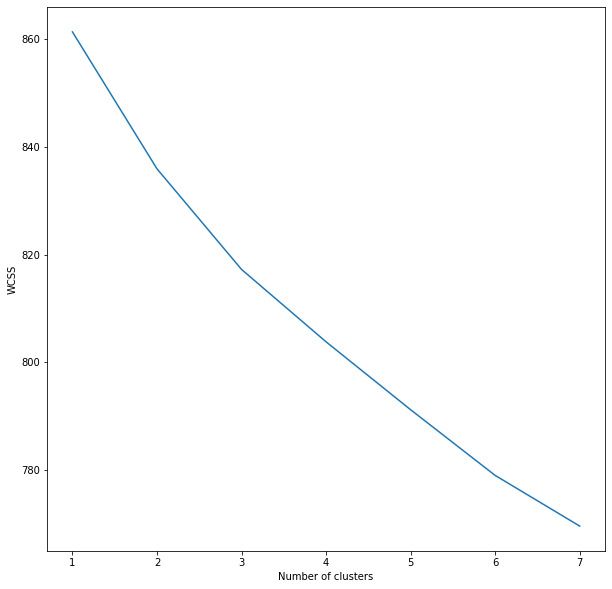

In [24]:
wcss = []
for i in range(1,8):
    model = KMeans(n_clusters = i, init = "k-means++")
    model.fit(WordFeatures)
    wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,8), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
pca = PCA(2)
data = pca.fit_transform(WordFeatures.toarray())
data

array([[ 0.08918771,  0.15697565],
       [-0.10415654, -0.02290166],
       [-0.15943083,  0.00942889],
       ...,
       [ 0.05732567, -0.20997165],
       [-0.22032577, -0.0921505 ],
       [-0.01388338,  0.18318916]])

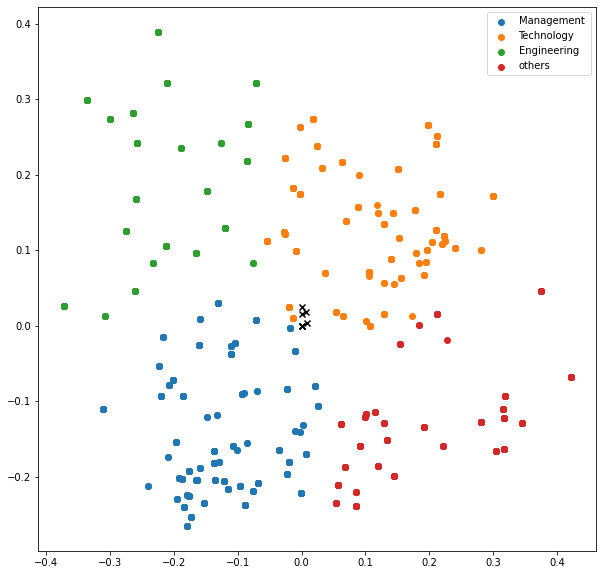

In [26]:
centers = np.array(model.cluster_centers_)
kmeans = KMeans(n_clusters=4)
kmeans.fit_predict(data)
clusters = kmeans.cluster_centers_
model = KMeans(n_clusters = 4, init = "k-means++")
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
 
    
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend(('Management ','Technology ','Engineering','others'))
plt.show()

## Op1-b
25 clustrs

In [27]:
Kmean_df=correx.copy()

In [28]:
requiredText_25 = Kmean_df['Resume'].values
requiredTarget_25 = Kmean_df['Category'].values

word_vectorizer_25 = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText_25)
WordFeatures_25 = word_vectorizer.transform(requiredText_25)

In [29]:
num_clusters = 25
km = KMeans(n_clusters=num_clusters)
km.fit(WordFeatures_25)

KMeans(n_clusters=25)

In [30]:
pca = PCA(2)
data_25 = pca.fit_transform(WordFeatures_25.toarray())
data_25

array([[ 0.08930319,  0.15646789],
       [-0.103944  , -0.02351406],
       [-0.15933777,  0.00950369],
       ...,
       [ 0.05704929, -0.20847888],
       [-0.22039486, -0.09134345],
       [-0.01398558,  0.18255024]])

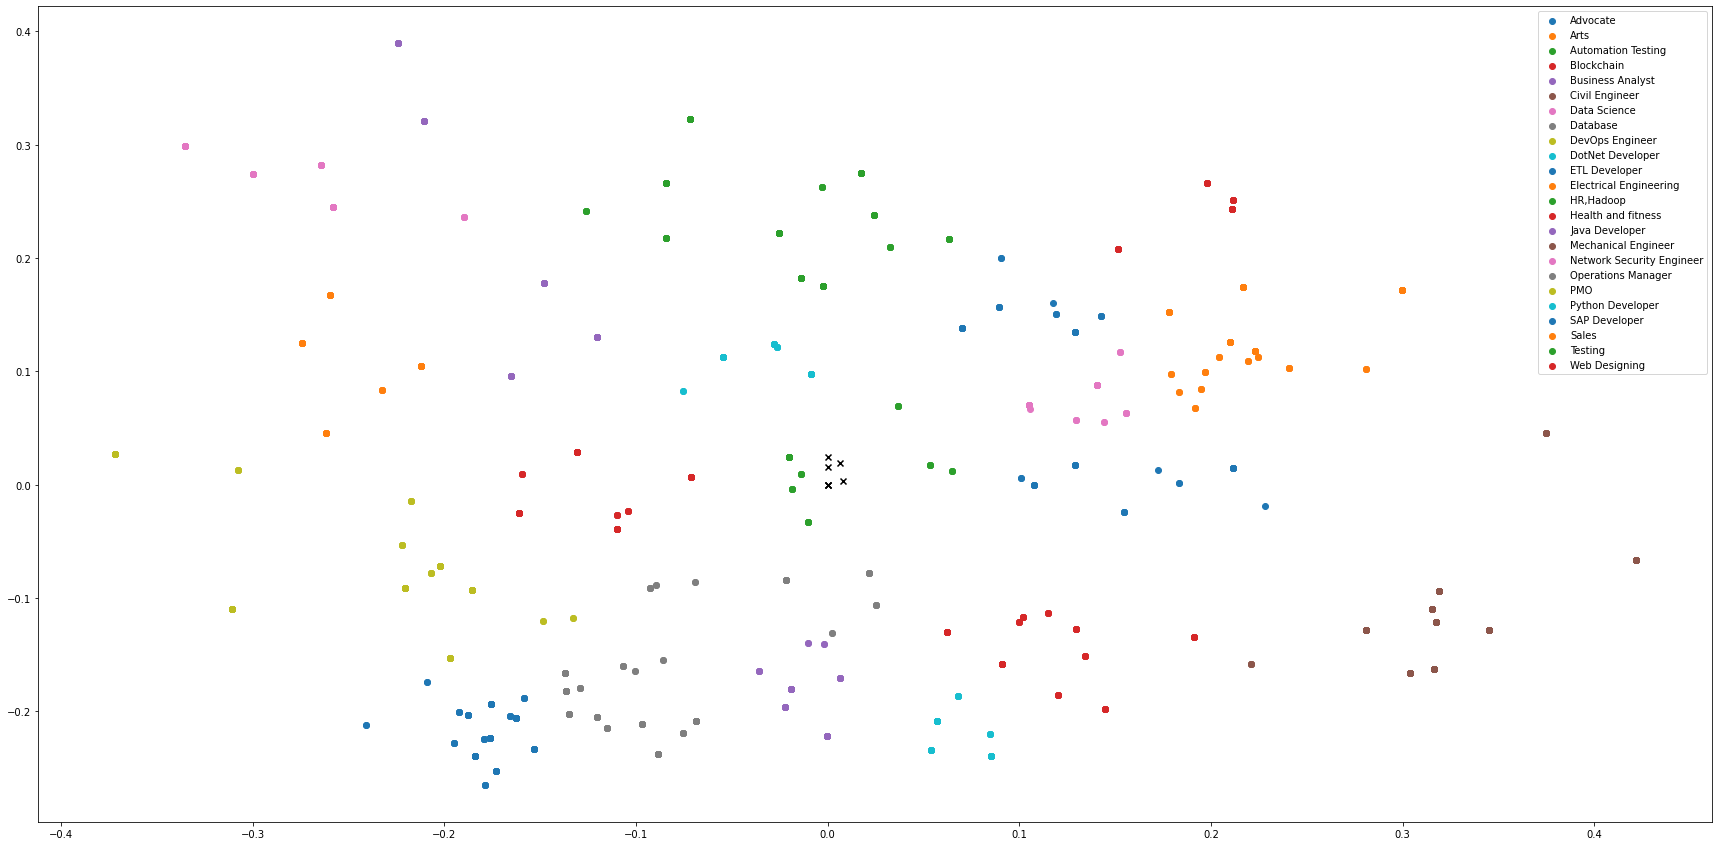

In [31]:
kmeans = KMeans(n_clusters=25)
kmeans.fit_predict(data_25)
clusters = kmeans.cluster_centers_
model = KMeans(n_clusters = 25, init = "k-means++")
label = model.fit_predict(data_25)
plt.figure(figsize=(30,15))
uniq = np.unique(label)
for i in uniq:
  
    plt.scatter(data_25[label == i , 0] , data_25[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend( ('Advocate','Arts','Automation Testing','Blockchain','Business Analyst','Civil Engineer','Data Science','Database','DevOps Engineer','DotNet Developer',
'ETL Developer','Electrical Engineering','HR,Hadoop','Health and fitness','Java Developer','Mechanical Engineer','Network Security Engineer','Operations Manager',
'PMO','Python Developer','SAP Developer','Sales','Testing','Web Designing'),loc='upper right')
plt.show()

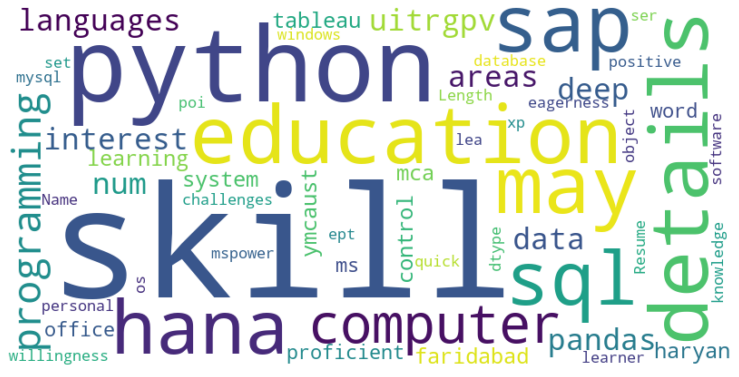

In [32]:
cloud=WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', width=800, height=400).generate(str(Kmean_df['Resume']))
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear');

# SVM With Count Vectorizer

In [38]:
SVM1 = svm.SVC(probability=True)
SVM1.fit(x_train,y_train)

SVC(probability=True)

In [39]:
svr_pred = SVM1.predict(x_test)
svr_acc = accuracy_score(y_test, svr_pred)
print(svr_acc, confusion_matrix(y_test, svr_pred),
      classification_report(y_test, svr_pred), sep = '\n\n')

0.9948186528497409

[[ 4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  1  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 

In [40]:
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [41]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, cv = kfolds, refit = True, verbose = 1)
 
# fitting the model for grid search
grid.fit(x_train, y_train)
grid.score(x_test, y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


1.0

In [42]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


In [44]:
SVM1 = svm.SVC(C=10, gamma=0.01)
SVM1.fit(x_train,y_train)

SVC(C=10, gamma=0.01)

In [46]:
svr_pred = SVM1.predict(x_test)
svr_acc = accuracy_score(y_test, svr_pred)
print(svr_acc, confusion_matrix(y_test, svr_pred),
      classification_report(y_test, svr_pred), sep = '\n\n')

0.9896373056994818

[[ 4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  4  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
   0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 

# SVM With TF-IDF Vectorizer

In [47]:
SVM = svm.SVC(C=10, gamma=0.1)
SVM.fit(x_train,y_train)

SVC(C=10, gamma=0.1)

In [48]:
SVM.score(x_train,y_train)

1.0

In [49]:
svm_pred = SVM.predict(x_test)
svm_acc = accuracy_score(y_test, svm_pred)
print(svm_acc, confusion_matrix(y_test, svm_pred),
      classification_report(y_test, svm_pred), sep = '\n\n')

1.0

[[ 4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0 